In [79]:
import pandas as pd
import numpy as np
import matplotlib as plt
import os
from scipy import stats
import datetime
import seaborn as sns

%matplotlib inline
os.chdir('/Users/flatironschooldc3/FlatironSchoolRepo/dc-ds-111819/module-1/project/unzipped_data')
#os.chdir('/Users/flatironschooldc/Code/LearnCo/dc-ds-111819/module-1/project/data/')



# ''' Our to do list .   '''
# '''
# 1) Get a nice plot for time trends

# 2) Run regression with ROI

# 3) Clean up Genre + Make Dummies

# 4) Segmenting anaylsis by moive budget, time, studio, maybe other categories


# '''

In [89]:
films = pd.read_csv('films.csv')
films2 = pd.read_csv('imdbom.csv')

films_yr = films.groupby('year').agg(['mean'])
films_yr.columns

MultiIndex([(       'Unnamed: 0', 'mean'),
            (  'runtime_minutes', 'mean'),
            (    'averagerating', 'mean'),
            (         'numvotes', 'mean'),
            ( 'domestic_gross_x', 'mean'),
            (    'foreign_gross', 'mean'),
            ('production_budget', 'mean'),
            (  'worldwide_gross', 'mean'),
            (     'domestic_roi', 'mean'),
            (    'worldwide_roi', 'mean'),
            (       'popularity', 'mean'),
            (     'vote_average', 'mean'),
            (       'vote_count', 'mean'),
            (     'title_change', 'mean')],
           )

In [81]:
films_yr.columns = [x for (x,y) in films_yr.columns]
films_yr.reset_index(inplace=True)
films_yr.columns

Index(['year', 'Unnamed: 0', 'runtime_minutes', 'averagerating', 'numvotes',
       'domestic_gross_x', 'foreign_gross', 'production_budget',
       'worldwide_gross', 'domestic_roi', 'worldwide_roi', 'popularity',
       'vote_average', 'vote_count', 'title_change'],
      dtype='object')

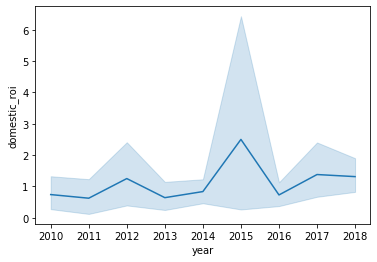

In [82]:
films_yr['sub'] = 0 #add a null column that seaborn needs
#see https://stackoverflow.com/questions/42955079/seaborn-tsplot-not-showing-data

# Using lineplot instead of tsplot (based on notice for deprecated function)
sns.lineplot(data=films, x='year',y='domestic_roi')

# sns.tsplot(films_yr, time='year',value='domestic_roi',unit='sub')
# sns.tsplot(films_yr, time='year',value='worldwide_roi',unit='sub')
# sns.tsplot(films_yr, time='year',value='production_budget',unit='sub')
# sns.tsplot(films_yr, time='year',value='popularity',unit='sub')
# sns.tsplot(films_yr, time='year',value='averagerating',unit='sub')

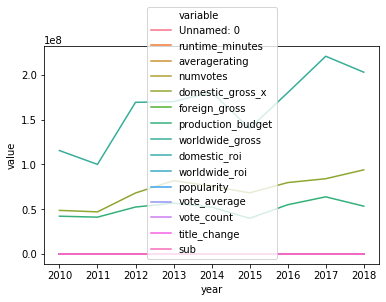

In [83]:
# How everything look together?
sns.lineplot(data=pd.melt(films_yr, ['year']), x='year',y='value', hue='variable', legend='brief')

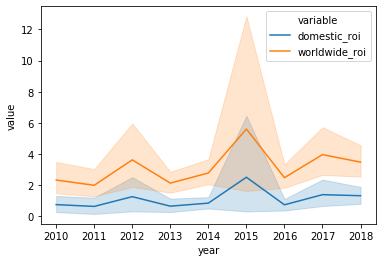

In [84]:
# Plot relevant subsets of data together on one plot by first subetting df

films_roi=films.filter(items=['year','domestic_roi', 'worldwide_roi'])
sns.lineplot(data=pd.melt(films_roi, ['year']), x='year',y='value', hue='variable', legend='full')

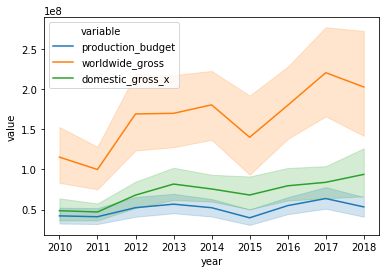

In [85]:
films_bd=films.filter(items=['year','production_budget','worldwide_gross', 'domestic_gross_x'])
sns.lineplot(data=pd.melt(films_bd, ['year']), x='year',y='value', hue='variable', legend='full')

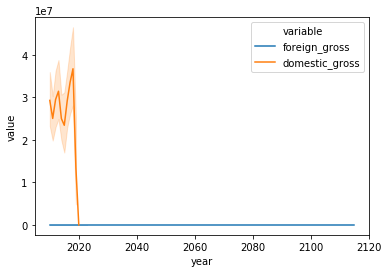

In [90]:
films2_bd=films2.filter(items=['year','foreign_gross', 'domestic_gross'])
sns.lineplot(data=pd.melt(films2_bd, ['year']), x='year',y='value', hue='variable', legend='full')

count    967.000000
mean       0.797100
std        2.573567
min       -1.000000
25%       -0.520986
50%        0.038275
75%        1.078856
max       21.796861
Name: domestic_roi, dtype: float64

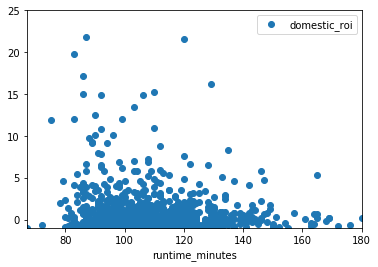

In [86]:
films_test = films[films['domestic_roi']<30] #clip some outliers
films_test.plot(x='runtime_minutes',y='domestic_roi',style='o',ylim=(-1,25)) 
films_test.domestic_roi.describe()

In [87]:
import statsmodels.api as sm # import statsmodels 


def regression(df,y,x):
        X = df[x] ## X usually means our input variables (or independent variables)
        Y = df[y] ## Y usually means our output/dependent variable
        X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

        # Note the difference in argument order for oridinary least squares (OLS)
        model = sm.OLS(Y, X).fit() ## sm.OLS(output, input)
        predictions = model.predict(X)

        # Print out the statistics
        print(model.summary())

In [88]:
regression(films,'domestic_roi','year')

                            OLS Regression Results                            
Dep. Variable:           domestic_roi   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7792
Date:                Tue, 03 Dec 2019   Prob (F-statistic):              0.378
Time:                        12:25:47   Log-Likelihood:                -3385.1
No. Observations:                 970   AIC:                             6774.
Df Residuals:                     968   BIC:                             6784.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -179.1944    204.271     -0.877      0.3